# Analyzing Changes in Electorate by Gender

### Summary

This notebook analyzes trends related to the gender of the Brazilian electorate, looking into how the gender distribution of immigrant Brazilian voters has changed over time.


## Importing and Cleaning Data

The following code imports the relevant packages/code and cleans the individual datasets as necessary.


In [14]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_cleaning.country_match import country_code_map as geomap
from data_cleaning import cleaning_utilities
from data_cleaning.education_codes import add_education_codes
from data_cleaning.education_codes import clean2018

## Importing and Combining Data
The following code imports the (cleaned) individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [15]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)

    return df


In [16]:
df_1998 = pd.read_csv('../data/clean/perfil_eleitorado_1998.csv')
df_2002 = pd.read_csv('../data/clean/perfil_eleitorado_2002.csv')
df_2006 = pd.read_csv('../data/clean/perfil_eleitorado_2006.csv')
df_2010 = pd.read_csv('../data/clean/perfil_eleitorado_2010.csv')
df_2014 = pd.read_csv('../data/clean/perfil_eleitorado_2014.csv')
df_2018 = pd.read_csv('../data/clean/perfil_eleitorado_2018.csv')

In [17]:
# combine the dataframes that were previously extracted 

df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined


Aggregate Data


,Unnamed: 0,election_year,place_(zz_=_exterior),municipality_code,municipality_name,gender_code,gender_description,marital_status_code,marital_status_description,age_group_code,age_group_description,educational_attainment_code,educational_attainment_description,quantity_of_voters
0,0,1998,ZZ,11487,POLONIA,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,57
1,1,1998,ZZ,98361,NIGERIA,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,44
2,2,1998,ZZ,98965,ANGOLA,2,MASCULINO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,95
3,3,1998,ZZ,98507,COSTA RICA,4,FEMININO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,95
4,4,1998,ZZ,98620,BULGARIA,4,FEMININO,-3.0,#NE,-3.0,#NE,0,NAO INFORMADO,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76996,33635,2018,ZZ,29190,JAMAICA,2,MASCULINO,3.0,CASADO,5559.0,55 a 59 anos,8,SUPERIOR COMPLETO,3
76997,33636,2018,ZZ,29190,JAMAICA,2,MASCULINO,3.0,CASADO,6569.0,65 a 69 anos,7,SUPERIOR INCOMPLETO,1
76998,33637,2018,ZZ,29190,JAMAICA,2,MASCULINO,9.0,DIVORCIADO,5559.0,55 a 59 anos,7,SUPERIOR INCOMPLETO,1
76999,33638,2018,ZZ,29190,JAMAICA,4,FEMININO,3.0,CASADO,4549.0,45 a 49 anos,6,ENSINO MEDIO COMPLETO,1


# Analysis 

Below, we plot the total number of men and women Brazilian Immigrant Voters by year from years 1998 to 2018. The number of total voters has increased for each dataset analyzed, and the increase is especially notable from 2010 onwards. 

There are consistently more women than men voters, and the disparity between women and men voters increased from 1998 to 2006 before and gradually decreasing to lower than 2006 levels by 2018. Specifically,in 1998, 59% of the voters were women. At the peak disparity in 2006, 60.8% of the voters were women. In 2010, the electorate consisted of 60% women, and ultimately the electorate was 58% women in 2018.


In [18]:
def plot_genders(df):
    '''
    Plots the Total Brazilian Immigrant Gender Distribution by Year
    :param df - A pandas dataframe containing electorate data with all years labeled
    '''
    # resources consulted:
    # https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    # https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
    # https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
    
    # get quantity of male and female voters By year
    
    men = df[df['gender_description']=='MASCULINO']
    men = men[["election_year", "quantity_of_voters"]].groupby("election_year").sum()

    women = df[df['gender_description']=='FEMININO']
    women = women[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    
    def add_labels(x, y, offset):
        for i in range(len(x)):
            pos = plt.text(i + offset, y[i]+500, y[i], ha = 'center')


    # set default figure size.
    plt.rcParams['figure.figsize'] = (15,12)
    
    plt.bar(np.arange(men.size) + 0.2, 
            men['quantity_of_voters'], 
            width=0.4,
            label='Men', 
            color='r')
    
    
    add_labels(list(men.index), list(men['quantity_of_voters']), 0.2)
    
    
    plt.bar(x=np.arange(women.size) - 0.2, 
            height=women['quantity_of_voters'], 
            width=0.4,
            label = 'Women', 
            color='b')
    
    add_labels(list(women.index), list(women['quantity_of_voters']), -0.2)
    
    
    plt.xticks(list(np.arange(men.size)), list(men.index))
    plt.xlabel("Election Year",fontsize=14)
    plt.ylabel("Electorate Population",fontsize=14)
    plt.title(" Brazilian Immigrant Electorate Gender Distribution by Year",fontsize=16)
    
    plt.legend()
    plt.show()


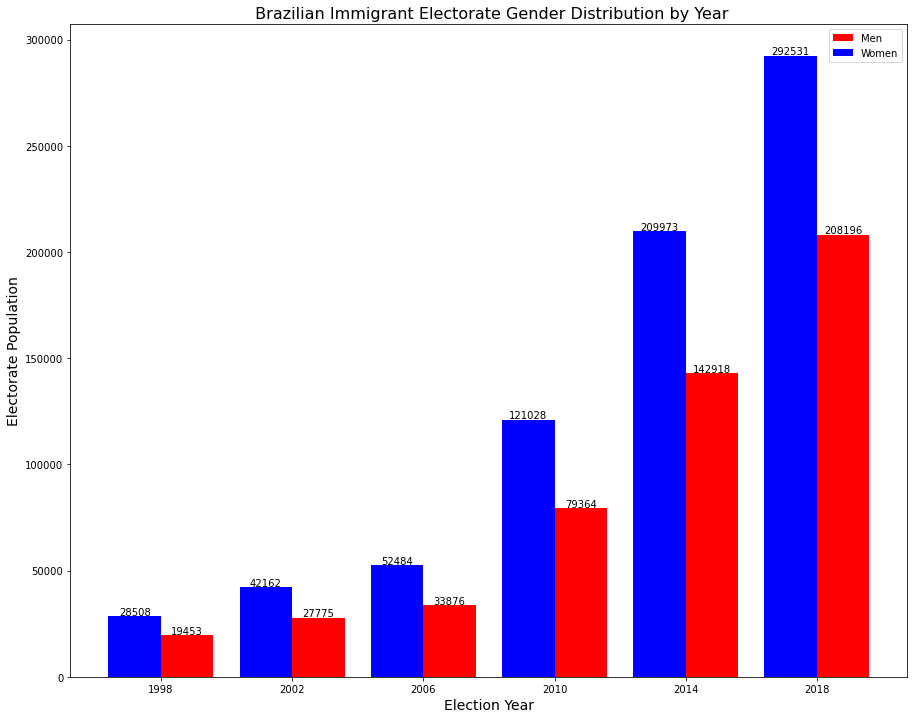

In [19]:
# run this to generate the plot

plot_genders(df_combined)

In [20]:
def df_education(df):
    """Plots the electorate decomposed by educational attainment"""
    Incomplete_Elementary_Education = df[df['educational_attainment_description'] == 'ENSINO FUNDAMENTAL INCOMPLETO']
    Incomplete_Elementary_Education = Incomplete_Elementary_Education[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a1 = Incomplete_Elementary_Education.values
  
    
    Complete_Elementary_Education = df[df['educational_attainment_description'] == 'ENSINO FUNDAMENTAL COMPLETO']
    Complete_Elementary_Education = Complete_Elementary_Education[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a2 = Complete_Elementary_Education.values
  
    
    Incomplete_Highschool_Education = df[df['educational_attainment_description'] == 'ENSINO MEDIO INCOMPLETO']
    Incomplete_Highschool_Education = Incomplete_Highschool_Education[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a3 = Incomplete_Highschool_Education.values

    
    Complete_Highschool_Education = df[df['educational_attainment_description'] == 'ENSINO MEDIO COMPLETO']
    Complete_Highschool_Education = Complete_Highschool_Education[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a4 = Complete_Highschool_Education.values

    
    Incomplete_College_Education = df[df['educational_attainment_description'] == 'SUPERIOR INCOMPLETO']
    Incomplete_College_Education = Incomplete_College_Education[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a5 = Incomplete_College_Education.values

    
    Complete_College_Education = df[df['educational_attainment_description'] == 'SUPERIOR COMPLETO']
    Complete_College_Education = Complete_College_Education[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a6 = Complete_College_Education.values
  
    
    Illiterate = df[df['educational_attainment_description'] == 'ANALFABETO']
    Illiterate = Illiterate[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a7 = Illiterate.values
  
    
    Literate = df[df['educational_attainment_description'] == 'LE E ESCREVE']
    Literate = Literate[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    a8 = Literate.values

    
    list1 = ["2002", a1[0][0], a2[0][0], a3[0][0], a4[0][0], a5[0][0], a6[0][0], a7[0][0], a8[0][0]]
    list2 = ["2006", a1[1][0], a2[1][0], a3[1][0], a4[1][0], a5[1][0], a6[1][0], a7[1][0], a8[1][0]]
    list3 = ["2010", a1[2][0], a2[2][0], a3[2][0], a4[2][0], a5[2][0], a6[2][0], a7[2][0], a8[2][0]]
    list4 = ["2014", a1[3][0], a2[3][0], a3[3][0], a4[3][0], a5[3][0], a6[3][0], a7[3][0], a8[3][0]]
    list5 = ["2018", a1[4][0], a2[4][0], a3[4][0], a4[4][0], a5[4][0], a6[4][0], a7[4][0], a8[4][0]]
    all_values = [list1, list2, list3, list4, list5]
    df = pd.DataFrame(all_values, columns = ["Year", "Incomplete Elementary Education", "Complete Elementary Education", "Incomplete Highschool Education", "Complete Highschool Education", "Incomplete College Education", "Complete College Education", "Illiterate", "Literate"])
    
    return df


def plot_education(df):
    df = df_education(df)
    bars = df.plot(x='Year',
            kind='bar',
            stacked=False,
            title='Electorate by Year Broken Down into Educational Attainment')
    
    plt.show()
    
def plot_education_women(df):
    df = df[df['gender_description']=='FEMININO']
    df = df_education(df)
    bars = df.plot(x='Year',
            kind='bar',
            stacked=False,
            title='Electorate by Year Broken Down into Educational Attainment: Women')
    
    plt.show()
    
    
def plot_education_men(df):
    df = df[df['gender_description']=='MASCULINO']
    df = df_education(df)
    bars = df.plot(x='Year',
            kind='bar',
            stacked=False,
            title='Electorate by Year Broken Down into Educational Attainment: Men')
    
    plt.show()

    

    
    
    

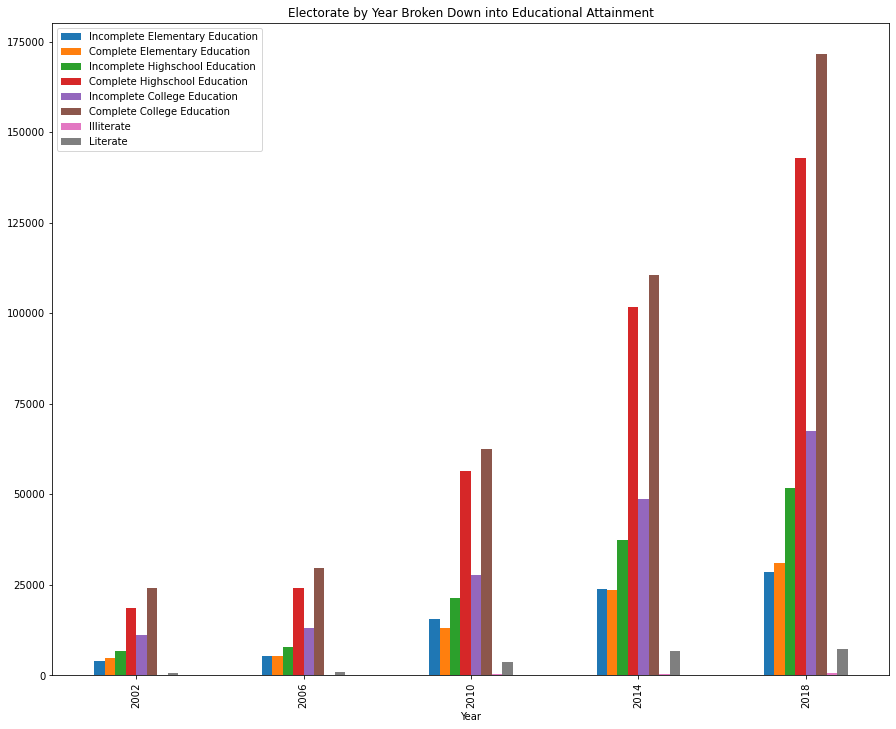

In [21]:
plot_education(df_combined)

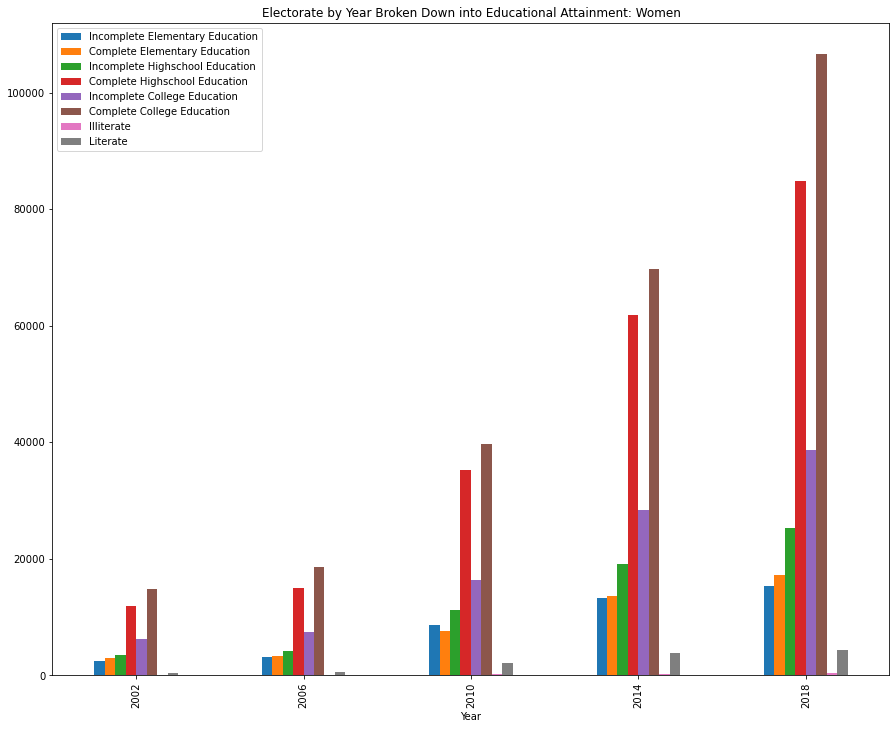

In [22]:
plot_education_women(df_combined)

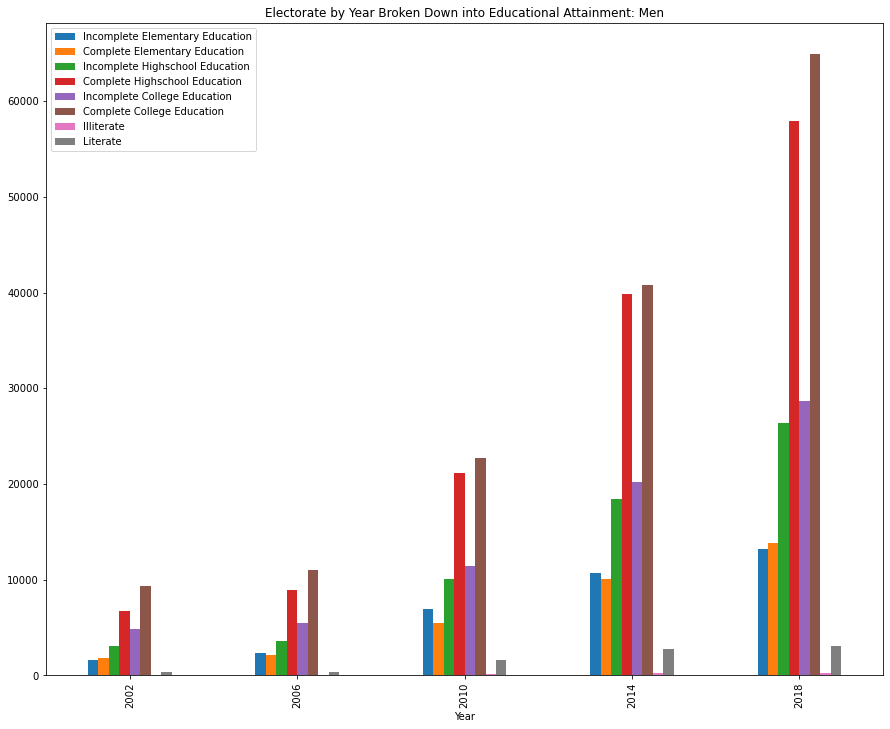

In [23]:
plot_education_men(df_combined)

In [36]:
def plot_education_by_country(df):
    
    educations = df["educational_attainment_description"].unique()
    years = df["election_year"].unique()
    years = years[1:]
    educations = educations[1:]
    
   
    
    for education in educations:
        sum_educations = []
        for year in years:
            df_year = df[df["election_year"] == year]
            sum_all = df_year["quantity_of_voters"].sum()
            df_year = df_year[df_year["educational_attainment_description"] == education]
            sum_education = df_year["quantity_of_voters"].sum()
            ratio_education = sum_education / sum_all
            sum_educations.append(ratio_education)
        
        plt.plot(years, sum_educations, label = str(education))
    
   
    plt.xticks(years)
    plt.xlabel("Year")
    plt.ylabel("Ratio of voters with the education attainment")
    plt.legend(loc="upper left")
    plt.title("Ratio of voters with the educational attainment by Year")
    plt.ylim(0,.5)
    plt.show()
    

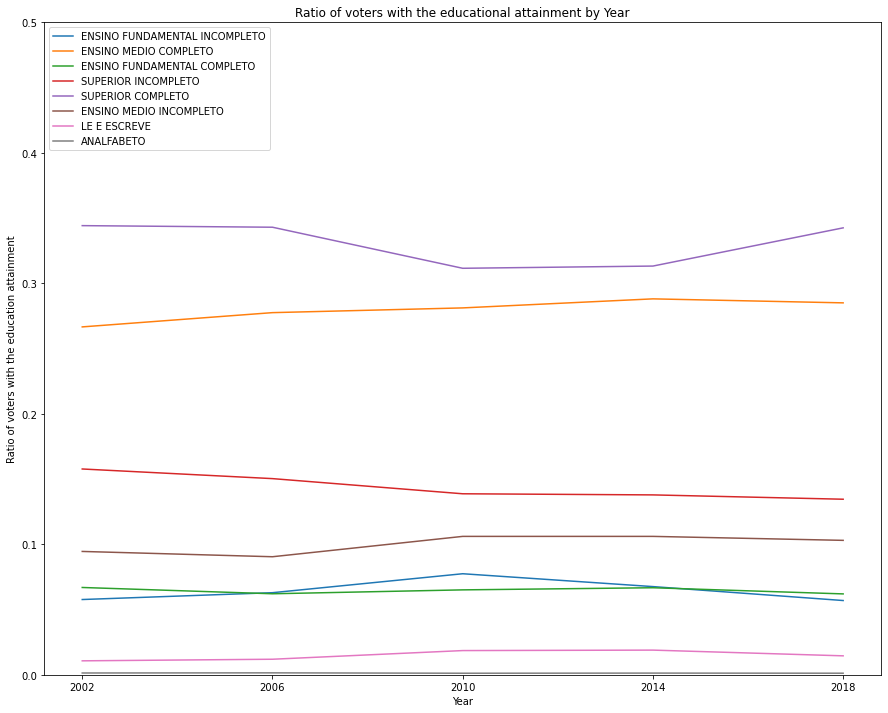

In [37]:
plot_education_by_country(df_combined)